# Offline diagnostics for the CASTLE single output networks following Rasp et al. (2018) architecture

# Cross Section Plots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printe
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [3]:
module_path = os.path.abspath(os.path.join('..'))
# Relative imports
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-04-12 17:33:03.546352: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Num GPUs Available:  0


In [5]:
from utils.setup import SetupDiagnostics
from neural_networks.load_models import load_models, get_save_plot_folder, load_single_model
from neural_networks.model_diagnostics import ModelDiagnostics
from pathlib import Path
from utils.variable import Variable_Lev_Metadata

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [6]:
import matplotlib.pyplot as plt

## Load trained CASTLE models

In [26]:
# PROJECT_ROOT = Path.cwd().parent.resolve()
PROJECT_ROOT = Path("/p/scratch/icon-a-ml/kuehbacher1")
base_dir = os.path.join(PROJECT_ROOT, "output_castle", "training_91_mask_net_prediction_thresholds_spars0.001") 

if "prediction_thresholds" in base_dir:
    train_val = "_train"
    cfg = os.path.join(base_dir, f"cfg_mask_net_thresholds{train_val}.yml") 
else: 
    train_val = ""
    cfg = os.path.join(base_dir, "cfg_mask_net.yml")
    
plot_dir = Path(base_dir, "plots_offline_evaluation", f"plots_cross_section{train_val}")

argv = ["-c", cfg]

In [27]:
# argv  = ["-c", "../output_castle/eval_nando/single_nn/cfg_single_nn_diagnostics.yml"]
# plot_dir = Path("../output_castle/eval_nando/single_nn/plots_offline_evaluation/plots_cross_section")

# argv  = ["-c", "../output_castle/eval_nando/causal_single_nn/cfg_causal_single_nn_diagnostics.yml"]
# plot_dir = Path("../output_castle/eval_nando/causal_single_nn/plots_offline_evaluation/plots_cross_section")

In [28]:
setup = SetupDiagnostics(argv)


Set leaky relu alpha to 0.3



### Load only models for one variables

In [12]:
var = "tphystnd"

In [9]:
var_list = list()
for spcam_var in setup.spcam_outputs:
    if var not in spcam_var.name:
        continue
    if spcam_var.dimensions == 3:
        var_levels = [setup.children_idx_levs, setup.parents_idx_levs] \
                [spcam_var.type == 'in']
        for level, _ in var_levels:
            var_name = f"{spcam_var.name}-{round(level, 2)}"
            var_list.append(var_name)


In [10]:
models = {setup.nn_type: dict()}
for v in var_list:
    models[setup.nn_type].update(load_single_model(castle_setup, v))



Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_28_custom_mirrored_functional/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_0_model.keras

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_28_custom_mirrored_functional/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_1_model.keras

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_28_custom_mirrored_functional/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_2_model.keras

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_28_custom_mirrored_functional/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_256_256_256_256_256_256_25

### Load all models

In [13]:
models = load_models(setup, skip_causal_phq=True)


Loading threshold file output_castle/training_91_mask_net_prediction_thresholds_spars0.001/threshold_performance/threshold_per_var_train.p


Load model: /p/scratch/icon-a-ml/kuehbacher1/output_castle/training_91_mask_net_prediction_thresholds_spars0.001/models/MaskNet/threshold0.0007/hl_256_256_256_256_256_256_256_256_256-act_LeakyReLU_0.3-e_9/1_0_model.keras

Loading threshold file output_castle/training_91_mask_net_prediction_thresholds_spars0.001/threshold_performance/threshold_per_var_train.p


Load model: /p/scratch/icon-a-ml/kuehbacher1/output_castle/training_91_mask_net_prediction_thresholds_spars0.001/models/MaskNet/threshold0.0001/hl_256_256_256_256_256_256_256_256_256-act_LeakyReLU_0.3-e_9/1_1_model.keras

Loading threshold file output_castle/training_91_mask_net_prediction_thresholds_spars0.001/threshold_performance/threshold_per_var_train.p


Load model: /p/scratch/icon-a-ml/kuehbacher1/output_castle/training_91_mask_net_prediction_thresholds_spars0.001/models/MaskNet/thre

In [14]:
model_key = setup.nn_type

In [15]:
len(models[model_key])

65

In [16]:
# Note: keys are variables not strings
if setup.nn_type == "CausalSingleNN":
    print(models[model_key][setup.pc_alphas[0]][setup.thresholds[0]].keys())
else: 
    print(models[model_key].keys())

dict_keys(['tphystnd-3.64', 'tphystnd-7.59', 'tphystnd-14.36', 'tphystnd-24.61', 'tphystnd-38.27', 'tphystnd-54.6', 'tphystnd-72.01', 'tphystnd-87.82', 'tphystnd-103.32', 'tphystnd-121.55', 'tphystnd-142.99', 'tphystnd-168.23', 'tphystnd-197.91', 'tphystnd-232.83', 'tphystnd-273.91', 'tphystnd-322.24', 'tphystnd-379.1', 'tphystnd-445.99', 'tphystnd-524.69', 'tphystnd-609.78', 'tphystnd-691.39', 'tphystnd-763.4', 'tphystnd-820.86', 'tphystnd-859.53', 'tphystnd-887.02', 'tphystnd-912.64', 'tphystnd-936.2', 'tphystnd-957.49', 'tphystnd-976.33', 'tphystnd-992.56', 'phq-3.64', 'phq-7.59', 'phq-14.36', 'phq-24.61', 'phq-38.27', 'phq-54.6', 'phq-72.01', 'phq-87.82', 'phq-103.32', 'phq-121.55', 'phq-142.99', 'phq-168.23', 'phq-197.91', 'phq-232.83', 'phq-273.91', 'phq-322.24', 'phq-379.1', 'phq-445.99', 'phq-524.69', 'phq-609.78', 'phq-691.39', 'phq-763.4', 'phq-820.86', 'phq-859.53', 'phq-887.02', 'phq-912.64', 'phq-936.2', 'phq-957.49', 'phq-976.33', 'phq-992.56', 'fsnt', 'fsns', 'flnt', 'fl

## Vertical cross-section plots

In [17]:
# This variable does not exist in the code (but key nn_type is the same)
setup.model_type = model_key

In [18]:
if setup.nn_type == "CausalSingleNN":
    md = ModelDiagnostics(setup=setup, 
                          models=models[model_key][setup.pc_alphas[0]][setup.thresholds[0]])
else: 
    md = ModelDiagnostics(setup=setup, 
                          models=models[model_key]) 

In [19]:
md

In [20]:
if setup.nn_type == "CausalSingleNN":
    dict_keys = models[model_key][setup.pc_alphas[0]][setup.thresholds[0]].keys()
else: 
    dict_keys = models[model_key].keys()

### Single Variable

In [17]:
var = Variable_Lev_Metadata.parse_var_name("tphystnd-0")

In [18]:
var_keys = [k for k in dict_keys if var.var.value in str(k)]


Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.

Processing variable tphystnd-7.59.
Test batch size = 8192.

Processing variable tphystnd-14.36.
Test batch size = 8192.

Processing variable tphystnd-24.61.
Test batch size = 8192.

Processing variable tphystnd-38.27.
Test batch size = 8192.

Processing variable tphystnd-54.6.
Test batch size = 8192.

Processing variable tphystnd-72.01.
Test batch size = 8192.

Processing variable tphystnd-87.82.
Test batch size = 8192.

Processing variable tphystnd-103.32.
Test batch size = 8192.

Processing variable tphystnd-121.55.
Test batch size = 8192.

Processing variable tphystnd-142.99.
Test batch size = 8192.

Processing variable tphystnd-168.23.
Test batch size = 8192.

Processing variable tphystnd-197.91.
Test batch size = 8192.

Processing variable tphystnd-232.83.
Test batch size = 8192.

Processing variable tphystnd-273.91.
Test batch size = 8192.

Processing variable tphystnd-322.24.

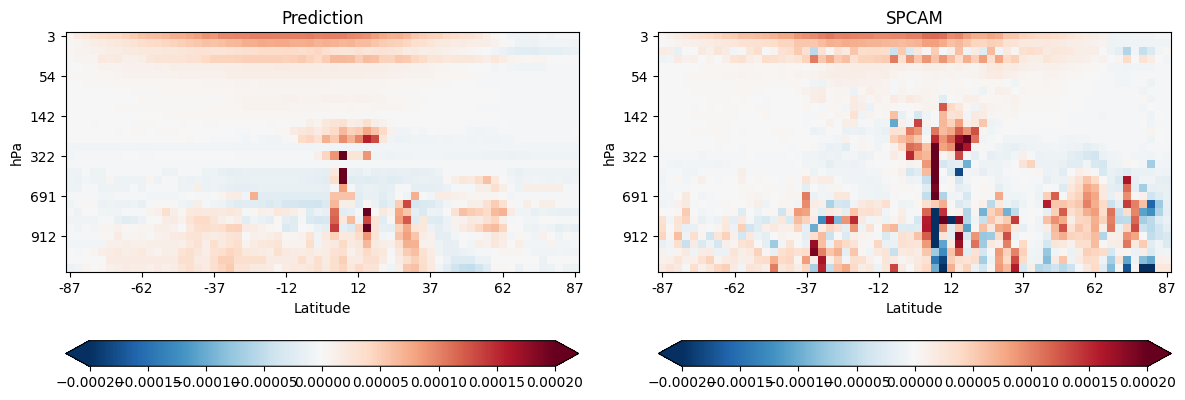

In [19]:
i_time = 1
n_time = 1440
fig, axes = castle_md.plot_double_yz(var, var_keys, itime=i_time, nTime=n_time, ilon=64, diff=False,
                                     cmap='RdBu_r', stats=False, save=plot_dir)

fig.show()

In [20]:
plt.close()


Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.

Processing variable tphystnd-7.59.
Test batch size = 8192.

Processing variable tphystnd-14.36.
Test batch size = 8192.

Processing variable tphystnd-24.61.
Test batch size = 8192.

Processing variable tphystnd-38.27.
Test batch size = 8192.

Processing variable tphystnd-54.6.
Test batch size = 8192.

Processing variable tphystnd-72.01.
Test batch size = 8192.

Processing variable tphystnd-87.82.
Test batch size = 8192.

Processing variable tphystnd-103.32.
Test batch size = 8192.

Processing variable tphystnd-121.55.
Test batch size = 8192.

Processing variable tphystnd-142.99.
Test batch size = 8192.

Processing variable tphystnd-168.23.
Test batch size = 8192.

Processing variable tphystnd-197.91.
Test batch size = 8192.

Processing variable tphystnd-232.83.
Test batch size = 8192.

Processing variable tphystnd-273.91.
Test batch size = 8192.

Processing variable tphystnd-322.24.

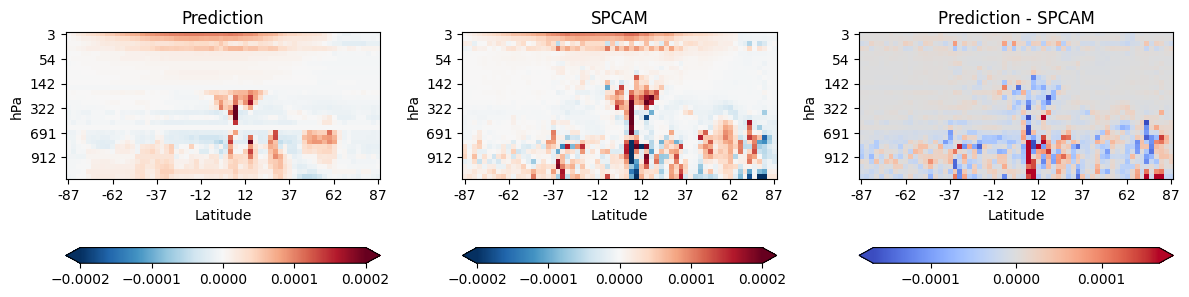

In [38]:
i_time = 1
n_time = 1440
fig, axes = castle_md.plot_double_yz(var, var_keys, itime=i_time, nTime=n_time, ilon=64, diff=True,
                                     cmap='RdBu_r', stats=False, save=plot_dir)

fig.show()

In [ ]:
plt.close

In [39]:
_ = castle_md.plot_double_yz(var, var_keys, itime=1, nTime=False, ilon=64, diff=False,
                             cmap='RdBu_r', save=plot_dir, stats=False, show_plot=False)



Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.

Processing variable tphystnd-7.59.
Test batch size = 8192.

Processing variable tphystnd-14.36.
Test batch size = 8192.

Processing variable tphystnd-24.61.
Test batch size = 8192.

Processing variable tphystnd-38.27.
Test batch size = 8192.

Processing variable tphystnd-54.6.
Test batch size = 8192.

Processing variable tphystnd-72.01.
Test batch size = 8192.

Processing variable tphystnd-87.82.
Test batch size = 8192.

Processing variable tphystnd-103.32.
Test batch size = 8192.

Processing variable tphystnd-121.55.
Test batch size = 8192.

Processing variable tphystnd-142.99.
Test batch size = 8192.

Processing variable tphystnd-168.23.
Test batch size = 8192.

Processing variable tphystnd-197.91.
Test batch size = 8192.

Processing variable tphystnd-232.83.
Test batch size = 8192.

Processing variable tphystnd-273.91.
Test batch size = 8192.

Processing variable tphystnd-322.24.

In [ ]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
fig, axes = castle_md.plot_double_yz(var, var_keys, itime='mean', nTime=1440, ilon=64, diff=False, show_plot=True, 
                                     cmap='RdBu_r', stats=False, save=plot_dir)

fig.show()


Plotting double_yz for variable tphystnd

Test batch size = 8192.
Time samples: 1440


In [ ]:
plt.close()


Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-168.23.
Test batch size = 8192.
Time samples: 

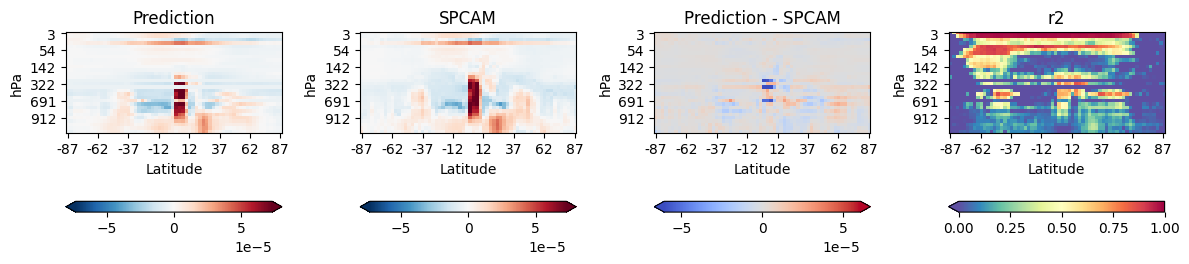

In [20]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
fig, axes = castle_md.plot_double_yz(var, var_keys, itime='mean', nTime=1440, ilon=64, diff=True, show_plot=True,
                                     cmap='RdBu_r', stats='r2', save=plot_dir)

fig.show()

In [ ]:
plt.close()

### All variables 3d variables

In [22]:
# only 3d
three_d_str = ["tphystnd-3.64", "phq-3.64"] 
three_d_keys = [Variable_Lev_Metadata.parse_var_name(var_str) for var_str in three_d_str]

if setup.nn_type == "CausalSingleNN":
    dict_keys = models[model_key][setup.pc_alphas[0]][setup.thresholds[0]].keys()
else: 
    dict_keys = models[model_key].keys()

In [23]:
# Not function parameters, uses variables that are set in Notebook cells!!
def run_plot_yz():
    for var in three_d_keys:
        print(f"\n\n---- Variable {var}")
        var_keys = [k for k in dict_keys if var.var.value in str(k)]

        _ = md.plot_double_yz(var, var_keys, itime=i_time, nTime=n_time, ilon=i_lon, diff=diff,
                              cmap='RdBu_r', stats=stats, show_plot=False, save=plot_dir)

#### Time step 1 without diff

In [29]:
i_time = 500
n_time = False
i_lon = 64
diff = False
stats = False

run_plot_yz()



---- Variable tphystnd-3.64

Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

Processing variable tphystnd-7.59.
Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

Processing variable tphystnd-14.36.
Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/

#### Time step 1 with diff

In [23]:
i_time = 1
n_time = False
i_lon = 64
diff = True
stats = False

run_plot_yz()



---- Variable tphystnd-3.64

Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.

Processing variable tphystnd-7.59.
Test batch size = 8192.

Processing variable tphystnd-14.36.
Test batch size = 8192.

Processing variable tphystnd-24.61.
Test batch size = 8192.

Processing variable tphystnd-38.27.
Test batch size = 8192.

Processing variable tphystnd-54.6.
Test batch size = 8192.

Processing variable tphystnd-72.01.
Test batch size = 8192.

Processing variable tphystnd-87.82.
Test batch size = 8192.

Processing variable tphystnd-103.32.
Test batch size = 8192.

Processing variable tphystnd-121.55.
Test batch size = 8192.

Processing variable tphystnd-142.99.
Test batch size = 8192.

Processing variable tphystnd-168.23.
Test batch size = 8192.

Processing variable tphystnd-197.91.
Test batch size = 8192.

Processing variable tphystnd-232.83.
Test batch size = 8192.

Processing variable tphystnd-273.91.
Test batch size = 8192.

Proces

#### Mean without diff

In [25]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90 
# Or: 120 as Nando did
i_time = "mean"
n_time = 1440
i_lon = 64
diff = False
stats = False


run_plot_yz()


tphystnd-3.64

Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-168.23.
Test batch size = 8192.


#### Mean with diff

In [46]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
i_time = "mean"
n_time = 1440
i_lon = 64
diff = True
stats = False

run_plot_yz()

tphystnd-3.64

Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-168.23.
Test batch size = 8192.


#### Mean no diff, ilon mean, stats r2

In [26]:
i_time = "mean"
n_time = 1440
i_lon = "mean"
diff = False
stats = "r2"

run_plot_yz()


tphystnd-3.64

Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-168.23.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440

Processing variable phq-14.36.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440

Processing variable phq-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-168.23.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-197.91.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-232.83.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-273.91.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-322.24.
Test batch size = 8192.
Time samples: 1440

#### Mean with diff, ilon mean, stats r2

In [47]:
i_time = "mean"
n_time = 1440
i_lon = "mean"
diff = True
stats = "r2"

run_plot_yz()


tphystnd-3.64

Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-168.23.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440

Processing variable phq-14.36.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440

Processing variable phq-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-168.23.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-197.91.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-232.83.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-273.91.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-322.24.
Test batch size = 8192.
Time samples: 1440

#### Mean no diff, ilon mean, stats mse

In [27]:
i_time = "mean"
n_time = 1440
i_lon = "mean"
diff = False
stats = "mse"

run_plot_yz()

tphystnd-3.64

Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-168.23.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440

Processing variable phq-14.36.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440

Processing variable phq-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-168.23.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-197.91.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-232.83.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-273.91.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-322.24.
Test batch size = 8192.
Time samples: 1440

#### Mean with diff, ilon mean, stats mse

In [27]:
i_time = "mean"
n_time = 1440
i_lon = "mean"
diff = True
stats = "mse"

run_plot_yz()

tphystnd-3.64

Plotting double_yz for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 14

divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time samples: 1440
Test batch size = 8192.
Time sample

#### All stats and diff


In [20]:
i_time = "mean"
n_time = 1440
i_lon = "mean"
diff = True # this doesn't matter
stats = ["mse", "r2"]

run_plot_yz()



---- Variable tphystnd-3.64

Plotting double_yz for variable tphystnd.


Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-168.23.
Test bat

divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440

Processing variable phq-14.36.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in divide


Time samples: 1440

Processing variable phq-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-168.23.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-197.91.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-232.83.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-273.91.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-322.24.
Test batch size = 8192.
Time samples: 1440

## Clean up

In [21]:
import gc

In [ ]:
del castle_models

In [ ]:
del castle_md

In [ ]:
gc.collect()